In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

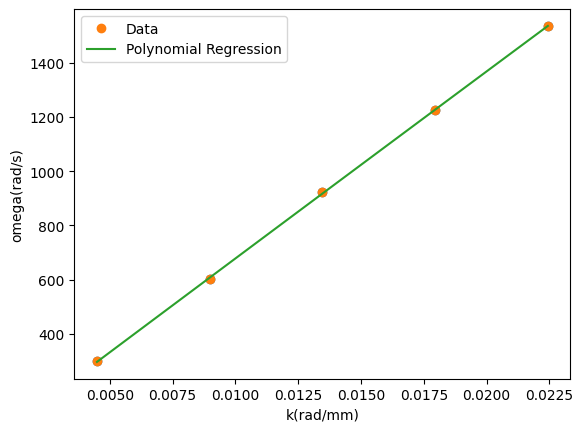

[-1.55971844e+04  6.94540000e+04 -1.50796447e+01]
R-squared value: 0.9999386419506135


In [37]:

data = pd.read_excel('data.xlsx',sheet_name='A')[0:5]
data['k'] = np.pi * data['n'] / data['L']
data['omega'] = 2 * np.pi * data['f'] 
plt.plot(data['k'],data['omega'],'o')
# Perform polynomial regression
degree = 2  # Specify the degree of the polynomial
coefficients = np.polyfit(data['k'], data['omega'], degree)

# Generate polynomial function
poly_func = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(data['k'].min(), data['k'].max(), 100)

# Generate y values using the polynomial function
y_values = poly_func(x_values)

# Plot the data and the polynomial regression curve
plt.plot(data['k'], data['omega'], 'o', label='Data')
plt.plot(x_values, y_values, label='Polynomial Regression')
plt.xlabel('k(rad/mm)')
plt.ylabel('omega(rad/s)')
plt.legend()
plt.show()
print(coefficients)
# Calculate R-squared value
r_squared = r2_score(data['omega'], poly_func(data['k']))

print("R-squared value:", r_squared)


Regression coefficients:
a = 6980.1909820076635
b = 6926857730.921564


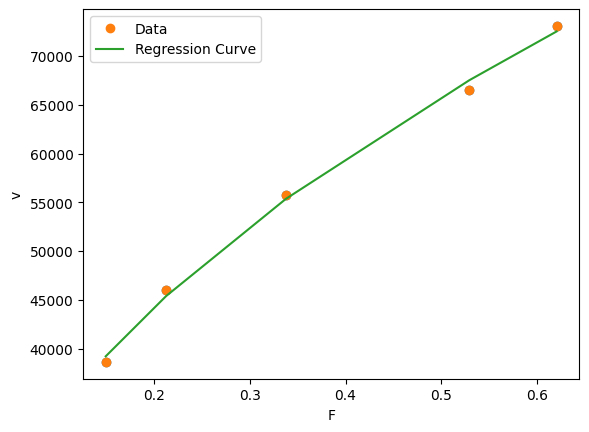

R-squared value: 0.9999386419506135


In [43]:

data = pd.read_excel('data.xlsx',sheet_name='B')
data = data.sort_values('F')

data['k'] = np.pi / data['L']
data['omega'] = 2 * np.pi * data['f']
data['v'] = data['omega'] / data['k']
plt.plot(data['F'],data['v'],'o')

def fun(x, a, b):
    return a + np.sqrt(b*x)

# Perform nonlinear regression
popt, pcov = curve_fit(fun, data['F'], data['v'])

# Retrieve the regression coefficients
a = popt[0]
b = popt[1]

print("Regression coefficients:")
print("a =", a)
print("b =", b)
# Plot the data and the regression curve
plt.plot(data['F'], data['v'], 'o', label='Data')
plt.plot(data['F'], fun(data['F'], a, b), label='Regression Curve')
plt.xlabel('T(N)')
plt.ylabel('v(mm/s)')
plt.legend()
plt.show()
print("R-squared value:", r_squared)



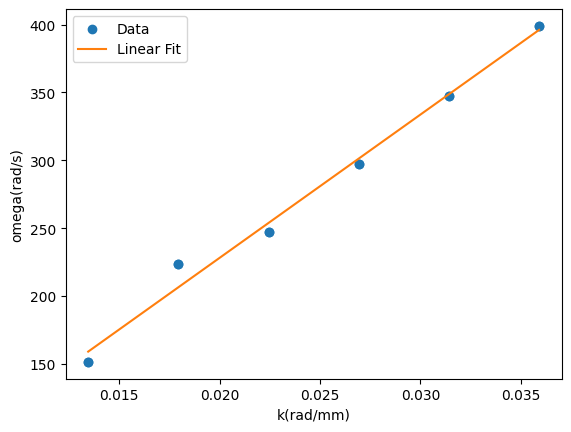

拟合参数:
斜率: 10562.799999999994
截距: 16.80722149740526
0.989671901665245


In [50]:
import numpy as np
data = pd.read_excel('data.xlsx',sheet_name='C')

data['k'] = np.pi* data['n'] / data['L']
data['omega'] = 2 * np.pi * data['f']
data['v'] = data['omega'] / data['k']
plt.plot(data['k'],data['omega'],'o')

import matplotlib.pyplot as plt

# 数据
x = data['k']
y = data['omega']

# 线性拟合
coefficients = np.polyfit(x, y, 1)
poly_func = np.poly1d(coefficients)

# 绘制拟合结果
plt.scatter(x, y, label='Data')
plt.plot(x, poly_func(x), label='Linear Fit')
plt.xlabel('k(rad/mm)')
plt.ylabel('omega(rad/s)')
plt.legend()
plt.show()

# 报告拟合参数
slope = coefficients[0]
intercept = coefficients[1]
print("拟合参数:")
print("斜率:", slope)
print("截距:", intercept)

r_squared = r2_score(data['omega'], poly_func(data['k']))
print(r_squared)